In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action="ignore")

# SAT Math: Data Analysis
Welcome!  
In this notebook, we’ll review how to read and understand different types of graphs, tables, and charts.

You'll see:
- **Bar Plot** shows how many customers came each day.
- **Pie Chart** compares smokers and non-smokers.
- **Box Plot** reveals the distribution of tips on different days.
- **Scatter Plot** explores the relationship between total bill and tip, split by smoking status.
- **Line Plot** shows how average tip changes by meal time (Lunch or Dinner).


For each example, try answering the question that follows

# Given Table

In [8]:
tips = sns.load_dataset("tips")
tips.sample(20).reset_index(0).drop("index", axis=1)

,total_bill,tip,sex,smoker,day,time,size
0,32.40,6.00,Male,No,Sun,Dinner,4
1,16.40,2.50,Female,Yes,Thur,Lunch,2
2,16.27,2.50,Female,Yes,Fri,Lunch,2
3,28.17,6.50,Female,Yes,Sat,Dinner,3
4,14.78,3.23,Male,No,Sun,Dinner,2
5,34.63,3.55,Male,Yes,Sun,Dinner,2
6,13.94,3.06,Male,No,Sun,Dinner,2
7,27.05,5.00,Female,No,Thur,Lunch,6
8,7.74,1.44,Male,Yes,Sat,Dinner,2
9,19.49,3.51,Male,No,Sun,Dinner,2


# 📊 BarPlot
### What is it?  
A bar plot shows **counts or values for different categories**.  
Each category is on the x-axis, and the height of the bar represents the value for that category (like count, sum, or average).

### When to use it?  
- When you want to compare quantities across different groups or categories  
- For example, comparing the number of customers on each day of the week, or average test scores by subject

### Why is it useful?  
- It’s easy to understand and interpret  
- It helps you quickly spot which category is the largest or smallest

---

Example: Number of Customers by Day

The bar plot below shows how many customers visited the restaurant on each day of the week.  
Look at the graph and figure out which day had the most and least customers.

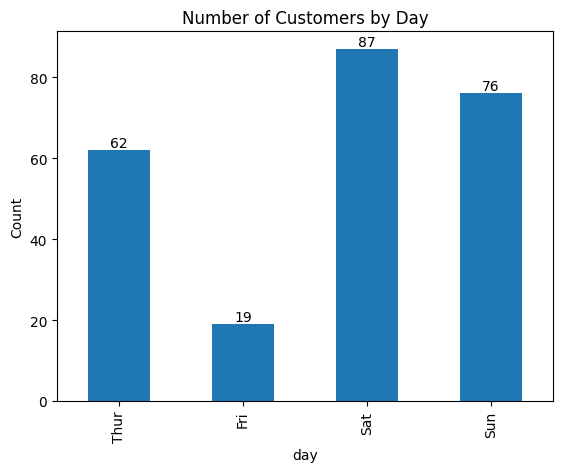

In [9]:
tips = sns.load_dataset("tips")

ax = (
    tips["day"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", title="Number of Customers by Day", ylabel="Count")
)
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        str(int(p.get_height())),
        ha="center",
        va="bottom",
    )
plt.show()

# 🥧 Pie Chart

### What is it?  
A pie chart shows **how parts make up a whole**. Each slice represents a category's percentage of the total.

### When to use it?  
- To show proportions or percentages  
- For example, percentage of smokers vs non-smokers

### Why is it useful?  
- Visualizes the relative size of each group clearly

---

### Example: Smoker vs Non-Smoker Percentage

Check the chart below to see the percentage of smokers and non-smokers.


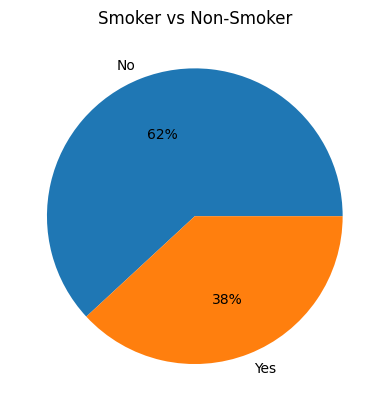

In [10]:
tips["smoker"].value_counts().plot(
    kind="pie", autopct="%1.0f%%", title="Smoker vs Non-Smoker", ylabel=""
)
plt.show()

# 📦 Box Plot

### What is it?  
A box plot shows the **distribution of data** based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.  
It can also show outliers.

### When to use it?  
- To understand spread and variability of data  
- For example, distribution of tips given on different days

### Why is it useful?  
- Quickly compares distributions across groups  
- Helps identify outliers

---

### Example: Tip Distribution by Day

Look at how tips vary by day of the week.


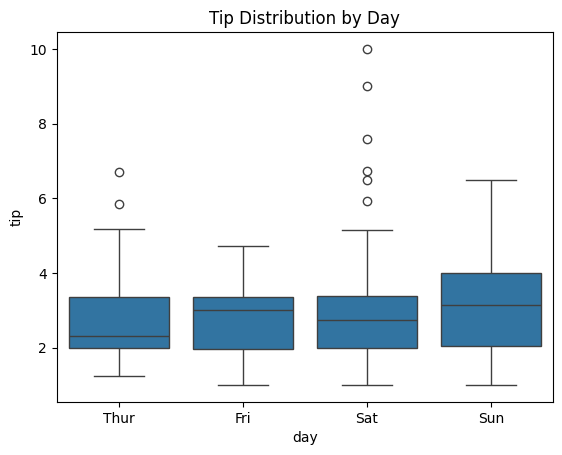

In [11]:
sns.boxplot(data=tips, x="day", y="tip")
plt.title("Tip Distribution by Day")
plt.show()

# 🔵 Scatter Plot

### What is it?  
A scatter plot shows the relationship between **two numerical variables**. Each point represents one observation.

### When to use it?  
- To see if two variables are related or correlated  
- For example, total bill amount vs tip given

### Why is it useful?  
- Reveals patterns, clusters, or outliers  
- Helpful for spotting correlations

---

### 📈 Example: Tip vs Total Bill (Smoker vs Non-Smoker)

Observe how tips change as total bills increase, split by smoking status.


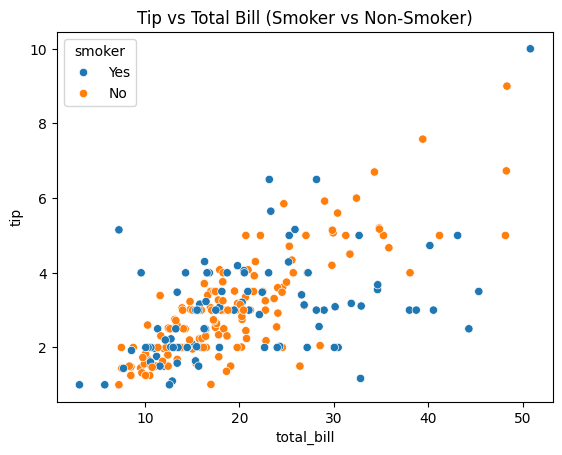

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker")
plt.title("Tip vs Total Bill (Smoker vs Non-Smoker)")
plt.show()

# 📊 Histogram

### What is it?  
A histogram shows the **distribution of a numerical variable** by grouping values into intervals (called bins).  
It counts how many values fall into each interval and represents that as a bar.

### When to use it?  
- To understand the **shape** of the data (e.g. normal, skewed, uniform)  
- To identify **spread**, **peaks**, and **outliers**

### Why is it useful?  
- Helps you see if the data is **normally distributed**  
- Useful for analyzing **variability** and making predictions

---

### 📈 Example: Distribution of Total Bill Amounts

The graph below shows how total bill values are distributed in the dataset.

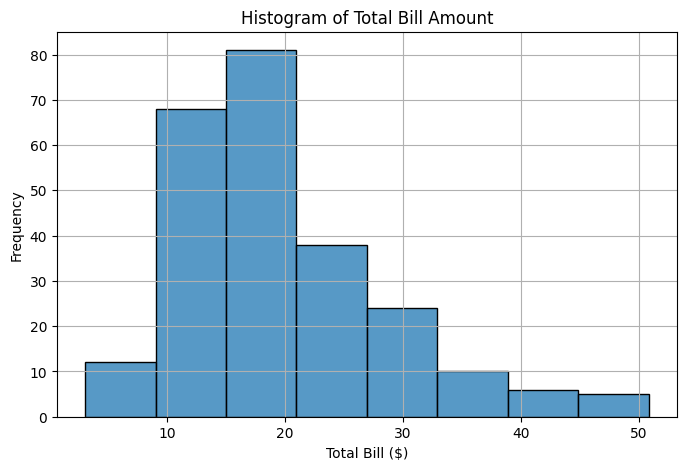

In [21]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(8, 5))
sns.histplot(tips["total_bill"], bins=8, kde=False)
plt.title("Histogram of Total Bill Amount")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 📏 Standard Deviation & Normal Distribution

### What is Standard Deviation?  
Standard deviation (std) measures **how spread out the values are** from the mean.  
- A small std → values are tightly clustered  
- A large std → values are more spread out

### Normal Distribution (Bell Curve)  
In a **normal distribution**:
- About **68%** of data falls within **1 standard deviation** of the mean  
- About **95%** falls within **2 standard deviations**  
- About **99.7%** falls within **3 standard deviations**  
(Also known as the 68–95–99.7 rule)

---

Let’s check if total bill values follow a normal distribution.


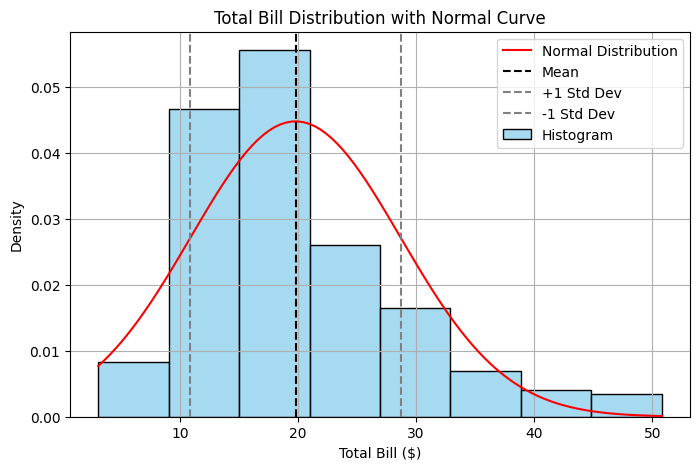

In [22]:
# 데이터
data = tips["total_bill"]

# 평균과 표준편차 계산
mean = data.mean()
std = data.std()

# 히스토그램 (density=True: 확률 밀도형)
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=8, stat="density", color="skyblue", label="Histogram")

# 정규분포 곡선 직접 계산
x = np.linspace(data.min(), data.max(), 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std**2))

plt.plot(x, pdf, color="red", label="Normal Distribution")
plt.axvline(mean, color="black", linestyle="--", label="Mean")
plt.axvline(mean + std, color="gray", linestyle="--", label="+1 Std Dev")
plt.axvline(mean - std, color="gray", linestyle="--", label="-1 Std Dev")

plt.title("Total Bill Distribution with Normal Curve")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

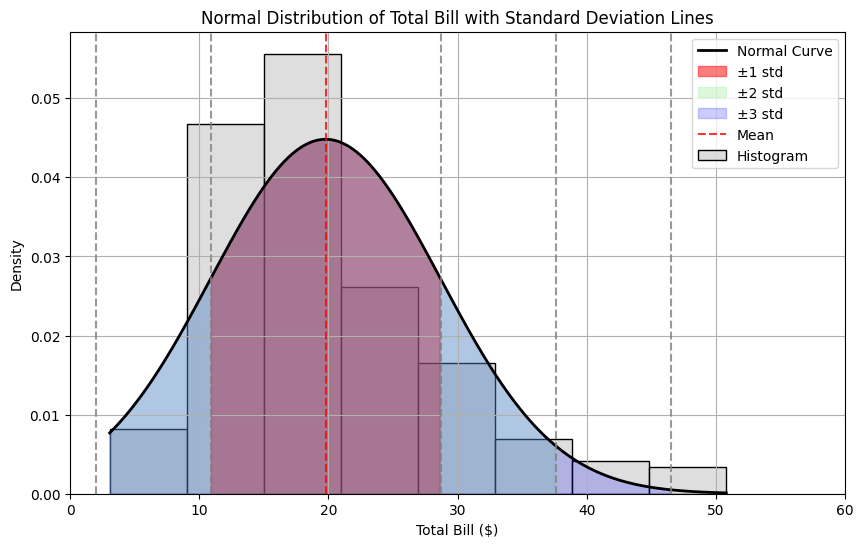

In [39]:
# 데이터셋
tips = sns.load_dataset("tips")
data = tips["total_bill"]

# 평균과 표준편차
mean = data.mean()
std = data.std()

# x값과 정규분포 계산
x = np.linspace(data.min(), data.max(), 500)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std**2))

# 그래프 시작
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=8, stat="density", color="lightgrey", label="Histogram")

# 정규분포 곡선
plt.plot(x, pdf, color="black", linewidth=2, label="Normal Curve")

# 색칠 영역
plt.fill_between(
    x,
    0,
    pdf,
    where=(x >= mean - std) & (x <= mean + std),
    color="red",
    alpha=0.5,
    label="±1 std",
)
plt.fill_between(
    x,
    0,
    pdf,
    where=(x >= mean - 2 * std) & (x <= mean + 2 * std),
    color="lightgreen",
    alpha=0.3,
    label="±2 std",
)
plt.fill_between(
    x,
    0,
    pdf,
    where=(x >= mean - 3 * std) & (x <= mean + 3 * std),
    color="blue",
    alpha=0.2,
    label="±3 std",
)

# 세로 점선 추가: mean, ±1 std, ±2 std, ±3 std
for i in range(-3, 4):
    color = "red" if i == 0 else "gray"
    label = "Mean" if i == 0 else None  # Avoid duplicate labels
    plt.axvline(mean + i * std, linestyle="--", color=color, alpha=0.8, label=label)

# 제목, 축, 범례
plt.title("Normal Distribution of Total Bill with Standard Deviation Lines")
plt.xlabel("Total Bill ($)")
plt.xlim([0, 60])
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# ⚫ Dot Plot

### What is it?  
A dot plot uses dots to show the frequency or value of data points for different categories.  
Each dot represents one or more observations.

### When to use it?  
- To compare counts or values across categories  
- Useful when you want a simple, clean visual alternative to bar plots

### Why is it useful?  
- Shows exact counts as dots  
- Easy to compare groups without large bars  
- Helps see distribution when counts are small

---

### 📈 Example: Number of Customers by Day (Dot Plot)

The dot plot below shows the count of customers for each day using d


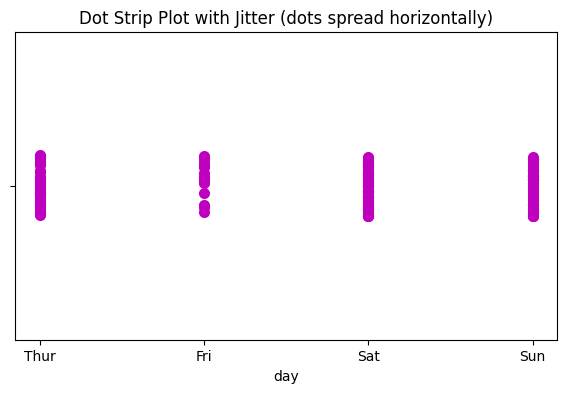

In [15]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(7, 4))
sns.stripplot(x="day", data=tips, jitter=True, size=8, c="m")
plt.title("Dot Strip Plot with Jitter (dots spread horizontally)")
plt.show()

# 📈 Line Plot

### What is it?  
A line plot shows trends over **continuous data**, often over time.

### When to use it?  
- To observe changes or trends  
- For example, average tip by time of day (Lunch vs Dinner)

### Why is it useful?  
- Makes it easy to compare values across ordered categories

---

### 📈 Example: Average Tip by Time of Day

See how average tip differs between Lunch and Dinner.


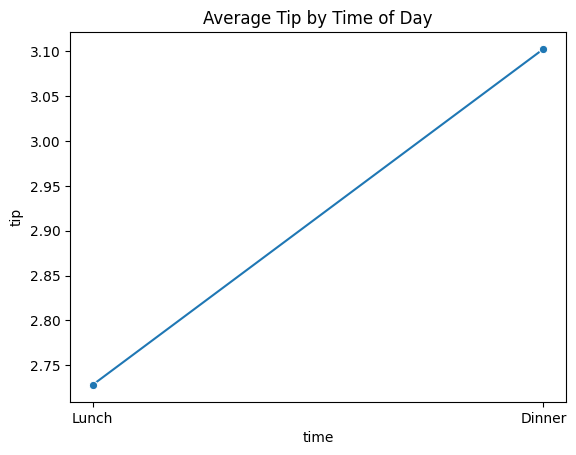

In [16]:
avg_tip_by_time = tips.groupby("time")["tip"].mean().reset_index()
sns.lineplot(data=avg_tip_by_time, x="time", y="tip", marker="o")
plt.title("Average Tip by Time of Day")
plt.show()

So it seems like tips data is not that appropriate for line graph so i am going to introduce another data

In [17]:
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Average_Score": [490, 500, 505, 515, 510, 520],
}
df = pd.DataFrame(data)
df

,Year,Average_Score
0,2018,490
1,2019,500
2,2020,505
3,2021,515
4,2022,510
5,2023,520


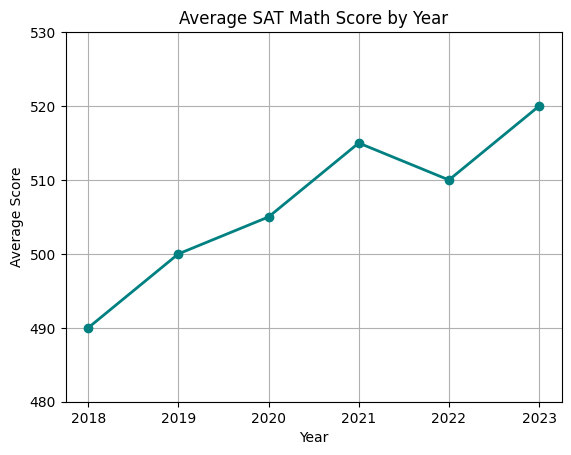

In [18]:
plt.plot(df["Year"], df["Average_Score"], marker="o", linewidth=2, color="teal")
plt.title("Average SAT Math Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True)
plt.xticks(df["Year"])
plt.ylim(480, 530)
plt.show()